# Fair Machine Learning - COMPAS dataset - Logistic Regression

In [2]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

pd.options.mode.chained_assignment = None  # default='warn'

In [95]:
raw_df = pd.read_csv('../../Data/compas7214.csv')
raw_df.head()

,Unnamed: 0,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [96]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               7214 non-null   int64  
 1   id                       7214 non-null   int64  
 2   name                     7214 non-null   object 
 3   first                    7214 non-null   object 
 4   last                     7214 non-null   object 
 5   compas_screening_date    7214 non-null   object 
 6   sex                      7214 non-null   object 
 7   dob                      7214 non-null   object 
 8   age                      7214 non-null   int64  
 9   age_cat                  7214 non-null   object 
 10  race                     7214 non-null   object 
 11  juv_fel_count            7214 non-null   int64  
 12  decile_score             7214 non-null   int64  
 13  juv_misd_count           7214 non-null   int64  
 14  juv_other_count         

Selecting Features:

| Variable | Description     
| :- |-------------:
| Sex | 1 if male, 0 if female |
| Age | Age in years |
| ... | ... |

In [97]:
# 
features = ['sex', 'age', 'juv_fel_count', 'juv_other_count', 
            'juv_misd_count', 'priors_count', 
            'race', 'c_charge_degree']

target = ['two_year_recid']

df = raw_df[features + target]

In [103]:
df.head(5)

,sex,age,juv_fel_count,juv_other_count,juv_misd_count,priors_count,c_charge_degree,two_year_recid,african_american
0,1,69,0,0,0,0,0,0,0
1,1,34,0,0,0,0,0,1,1
2,1,24,0,1,0,4,0,1,1
3,1,23,0,0,1,1,0,0,1
4,1,43,0,0,0,2,0,0,0


Encode sex, race and c_charge_degree:

In [99]:
# Gender (1 if male, 0 otherwise)
df.sex = (df['sex'] == 'Male').astype(int)

# Race (1 if african american, 0 otherwise)
df["african_american"] = (df['race'] == 'African-American').astype(int)
df.drop(['race'], axis=1, inplace=True)

# Charge Degree (1 if m, 0 otherwise)
df.c_charge_degree = (df['c_charge_degree'] == 'M').astype(int)

Standardize values and create numpy array X:

In [106]:
target = ['two_year_recid']

features = [f for f in df.columns if f not in target]

X = StandardScaler().fit_transform(df[features])

Create train, test split set:

In [130]:
random_state = 1234
n_splits = 10

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
                                                            X,
                                                            df[target], 
                                                            df.index,
                                                            test_size = 0.2, 
                                                            random_state = random_state)

# To avoid DataConversionWarning: A column-vector y was passed when a 1d array was expected.
y_train = np.ravel(y_train)

kfold = KFold(n_splits = n_splits,
              shuffle = True,
              random_state = random_state)

Create model and train it:

In [131]:
model = LogisticRegression()


model.fit(X_train, y_train)


result = {'Train_Score' : model.score(X_train, y_train),
          'Held_Out_Score' : model.score(X_test, y_test)}

print(result)

LogisticRegression()

{'Train_Score': 0.6761393172760354, 'Held_Out_Score': 0.6687456687456688}


Inspect coefficients

In [132]:
model.coef_

array([[ 0.11525722, -0.49455247,  0.10170998,  0.14426222,  0.04320274,
         0.67706357, -0.08758025,  0.08431221]])

Create confusion matrix:

Text(0.5, 1.0, 'Confusion matrix, without normalization')

Confusion matrix, without normalization
[[629 187]
 [291 336]]


Text(0.5, 1.0, 'Normalized confusion matrix')

Normalized confusion matrix
[[0.77083333 0.22916667]
 [0.46411483 0.53588517]]


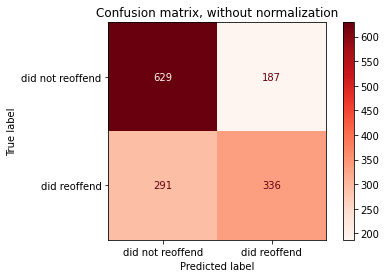

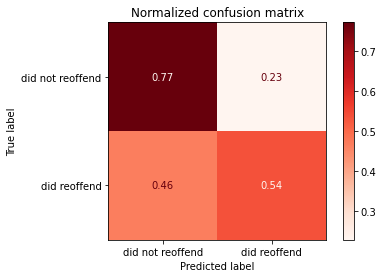

In [152]:
# create variable for predictions:
y_pred=model.predict(X_test)

# create confusion matrix:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=['did not reoffend', 'did reoffend'],
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Evaluate model based on accuracy, precision and recall:

In [155]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6687456687456688
Precision: 0.6424474187380497
Recall: 0.5358851674641149


Evaluate ROC of model:

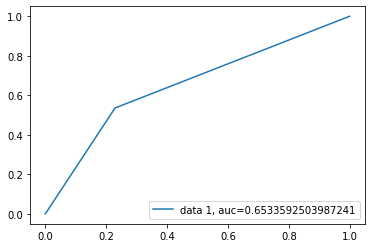

In [156]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()